In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('Iris.csv')

In [3]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [4]:
df.head(150)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

<AxesSubplot:xlabel='SepalWidthCm', ylabel='Count'>

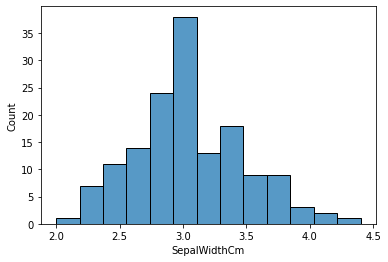

In [6]:
sns.histplot(data=df,x="SepalWidthCm")

<AxesSubplot:xlabel='SepalLengthCm', ylabel='Count'>

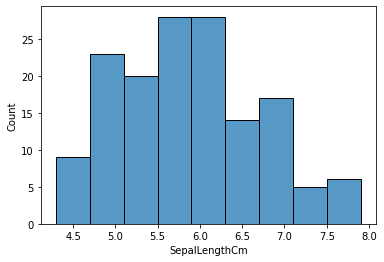

In [7]:
sns.histplot(data=df,x="SepalLengthCm")

<AxesSubplot:xlabel='PetalLengthCm', ylabel='Count'>

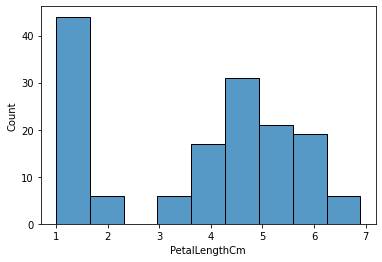

In [8]:
sns.histplot(data=df,x="PetalLengthCm")

<AxesSubplot:xlabel='PetalWidthCm', ylabel='Count'>

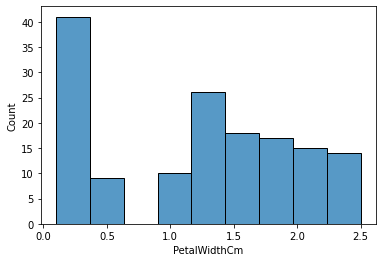

In [9]:
sns.histplot(data=df,x="PetalWidthCm")

<AxesSubplot:xlabel='PetalWidthCm', ylabel='Count'>

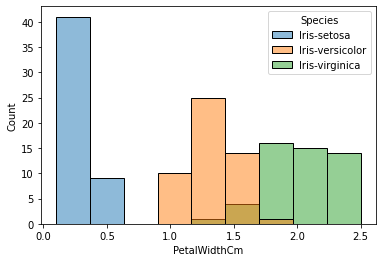

In [10]:
sns.histplot(data=df,x="PetalWidthCm",hue="Species")

<AxesSubplot:xlabel='PetalLengthCm', ylabel='Density'>

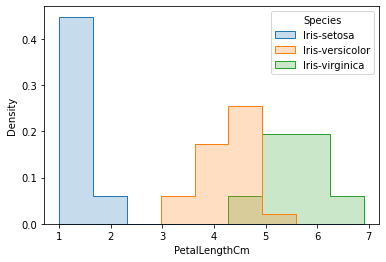

In [11]:
sns.histplot(df,x="PetalLengthCm",hue="Species",element="step",stat="density")

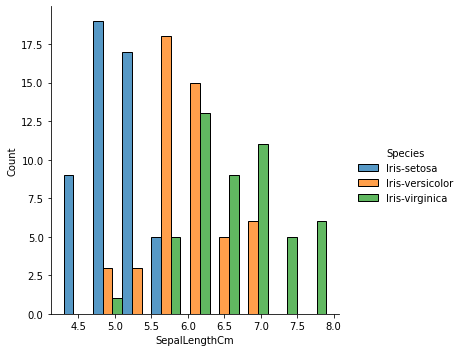

In [12]:
sns.displot(df,x="SepalLengthCm",hue="Species",multiple="dodge")

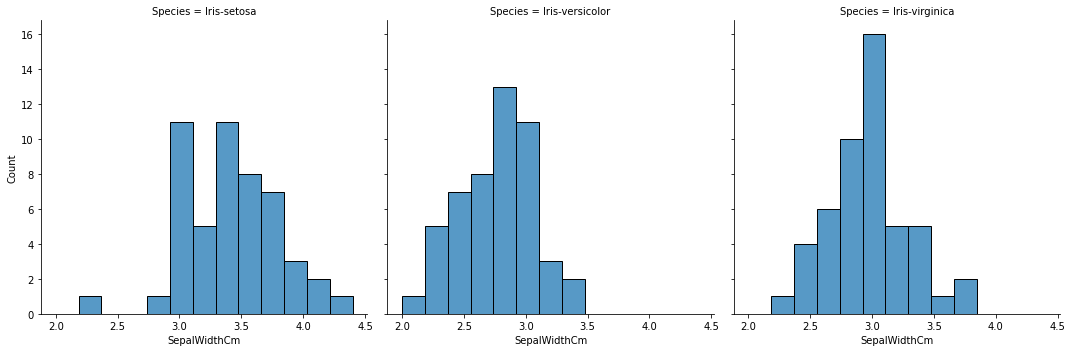

In [13]:
sns.displot(df,x="SepalWidthCm",col="Species")

<AxesSubplot:xlabel='PetalLengthCm', ylabel='Species'>

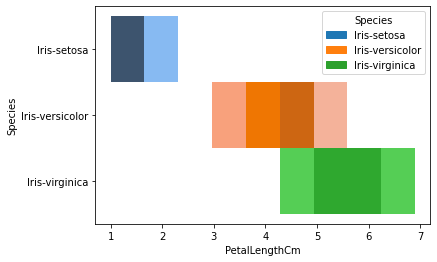

In [14]:
sns.histplot(df,x="PetalLengthCm",y="Species",hue="Species")

<AxesSubplot:xlabel='SepalLengthCm', ylabel='Count'>

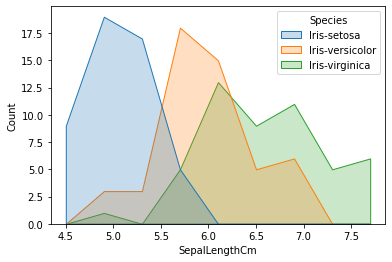

In [15]:
sns.histplot(df,x="SepalLengthCm",hue="Species",element="poly")

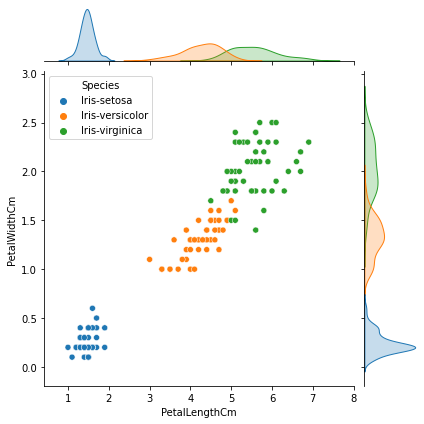

In [16]:
sns.jointplot(data=df,x="PetalLengthCm",y="PetalWidthCm",hue="Species")

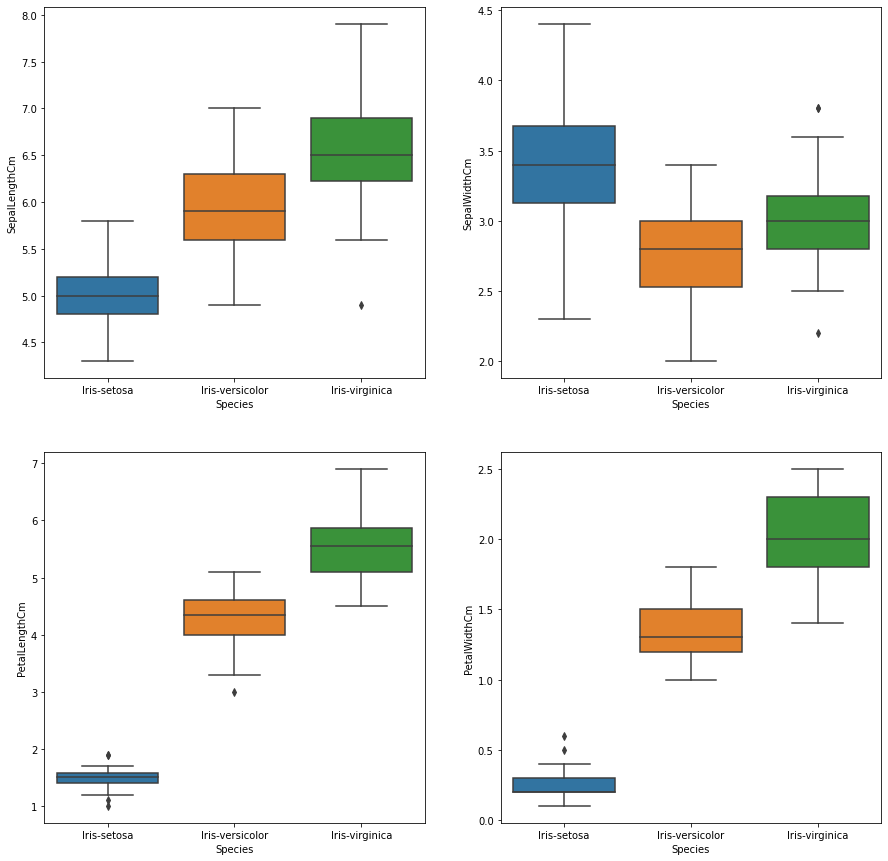

In [17]:
column_list = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

fig, axes = plt.subplots(2,2, figsize=(15,15))
axes_flat = axes.flatten()

index = 0
for axis in axes_flat:
    sns.boxplot(x='Species', y=column_list[index], data=df, ax=axis)
    index += 1

plt.show()

In [18]:
setosa=df[:50]
versicolor=df[50:100]
virginica=df[100:]

In [19]:
print("\n# Handling the outliers")
for i in ["PetalLengthCm", "PetalWidthCm"]:
    q1 = setosa[i].quantile(0.25)
    
    q3 = setosa[i].quantile(0.75)

    iqr = q3 - q1

    lower_limit = q1 - 1.5 * iqr
    upper_limit = q3 + 1.5 * iqr

    lower_outliers = setosa[i] < lower_limit
    upper_outliers = setosa[i] > upper_limit

    setosa[i] = setosa[i][~(lower_outliers)]
    setosa.fillna(value=q1,inplace=True)
    
    setosa[i] = setosa[i][~(upper_outliers)]
    setosa.fillna(value=q3,inplace=True)

for i in ["PetalLengthCm"]:
    q1 = versicolor[i].quantile(0.25)
    
    q3 = versicolor[i].quantile(0.75)

    iqr = q3 - q1

    lower_limit = q1 - 1.5 * iqr
    upper_limit = q3 + 1.5 * iqr

    lower_outliers = versicolor[i] < lower_limit
    upper_outliers = versicolor[i] > upper_limit

    versicolor[i] = versicolor[i][~(lower_outliers)]
    versicolor.fillna(value=q1,inplace=True)
    
    versicolor[i] = versicolor[i][~(upper_outliers)]
    versicolor.fillna(value=q3,inplace=True)

for i in ["SepalLengthCm", "SepalWidthCm"]:
    q1 = virginica[i].quantile(0.25)
    
    q3 = virginica[i].quantile(0.75)

    iqr = q3 - q1

    lower_limit = q1 - 1.5 * iqr
    upper_limit = q3 + 1.5 * iqr

    lower_outliers = virginica[i] < lower_limit
    upper_outliers = virginica[i] > upper_limit

    virginica[i] = virginica[i][~(lower_outliers)]
    virginica.fillna(value=q1,inplace=True)
    
    virginica[i] = virginica[i][~(upper_outliers)]
    virginica.fillna(value=q3,inplace=True)


# Handling the outliers


/tmp/ipykernel_6145/685789899.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  setosa[i] = setosa[i][~(lower_outliers)]
/tmp/ipykernel_6145/685789899.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  setosa.fillna(value=q1,inplace=True)
/tmp/ipykernel_6145/685789899.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [21]:
df2=pd.concat([setosa,versicolor,virginica])

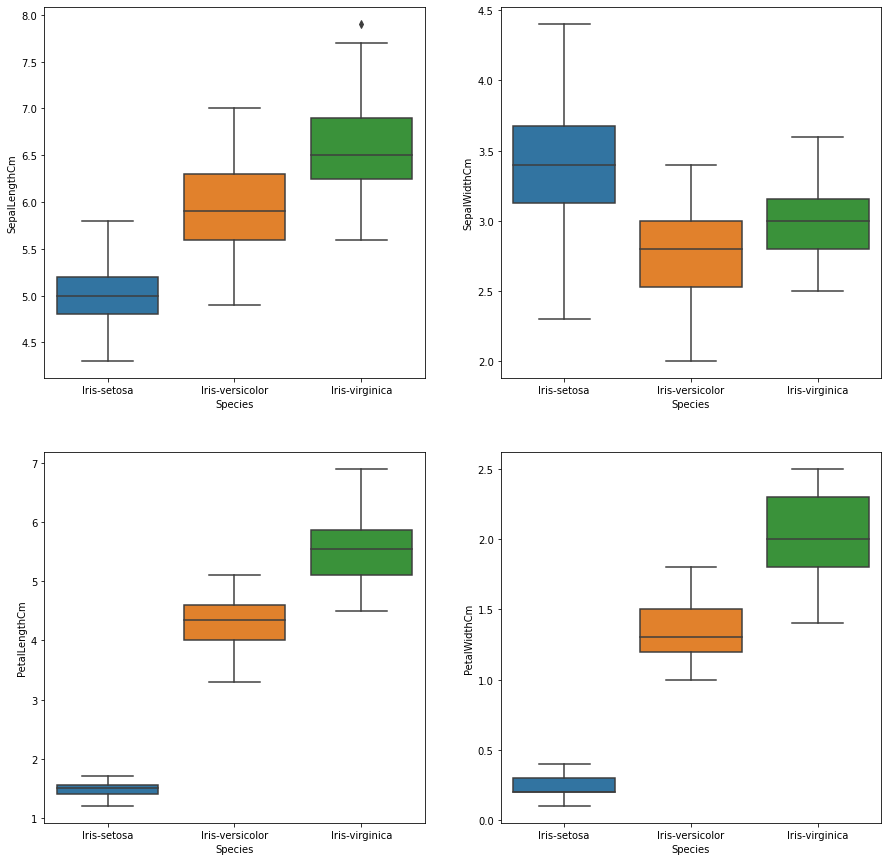

In [23]:
column_list = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

fig, axes = plt.subplots(2,2, figsize=(15,15))
axes_flat = axes.flatten()

index = 0
for axis in axes_flat:
    sns.boxplot(x='Species', y=column_list[index], data=df2, ax=axis)
    index += 1

plt.show()